In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,total_bill,tip
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.467458,0.458056
std,0.828066,0.435866,1.765298,0.762238,0.299203,0.317599
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.101695,0.083333
50%,5.800000,3.000000,4.350000,1.300000,0.567797,0.500000
75%,6.400000,3.300000,5.100000,1.800000,0.694915,0.708333
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   total_bill    150 non-null    float64
 6   tip           150 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


<Axes: xlabel='petal_length', ylabel='petal_width'>

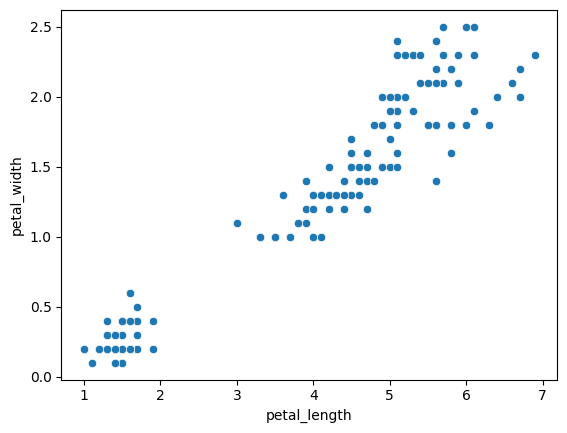

In [7]:
sns.scatterplot(x='petal_length', y='petal_width', data=df)

In [8]:
# preprocess the data
scalar = MinMaxScaler()
df[['total_bill', 'tip']] = scalar.fit_transform(df[['petal_length', 'petal_width']])

In [9]:
# Split the data into X and y
X = df[['petal_width']]
y = df['petal_length']

In [10]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# call the model
model = LinearRegression()

In [12]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# take out model intercept and slop, make an equation
print(model.intercept_)
print(model.coef_)
print('y = ', model.intercept_, '+', model.coef_, '* X')

1.107619575803485
[2.17847094]
y =  1.107619575803485 + [2.17847094] * X


In [14]:
# predict
y_pred = model.predict(X_test)

In [15]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  0.2723219917261927
R2 =  0.9042771303995948
RMSE =  0.5218447965882124


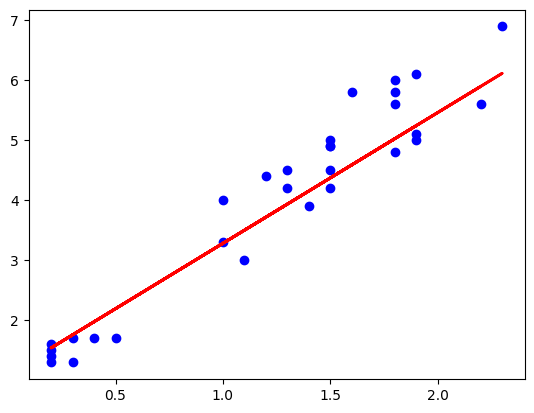

In [16]:
# Plot the model
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()